In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import datetime

print("Imports Done")

Imports Done


In [2]:
start = time.time()
chunk = pd.read_csv('data/questions.csv', chunksize=10000, on_bad_lines='skip')
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")
question_df = pd.concat(chunk)

question_df.head()

Read csv with chunks:  0.02199578285217285 sec


,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN


In [3]:
test = question_df["AskedOnUtc"][0]
test = str(test)
print(test)
def convert_time(stringy):
    date_time = stringy.split(" ")
    date_time[0] = date_time[0].split('-')
    #print(date_time)
    output = datetime.datetime(int(date_time[0][0]), int(date_time[0][1]), int(date_time[0][2]))
    return output

print(convert_time(test))

2019-06-19 22:10:06
2019-06-19 00:00:00


In [93]:
open_times = question_df["AskedOnUtc"]
taken_on_times = question_df["TakenOnUtc"]
closed_times = question_df["ClosedOnUtc"]

In [94]:
ask_to_take = []
take_to_close = []
ask_to_close = []

print(len(open_times))
print(len(taken_on_times))
print(len(closed_times))
num_times = len(open_times)

for i in range(num_times):
    temp_open = str(open_times[i])
    temp_taken = str(taken_on_times[i])
    temp_close = str(closed_times[i])
    
    if (temp_open.lower() != "nan" and temp_taken.lower() != "nan"):
        open_dt = convert_time(temp_open)
        taken_dt = convert_time(temp_taken)
        ask_to_take.append(int((taken_dt - open_dt).total_seconds() / 86400))
    
    if (temp_taken.lower() != "nan" and temp_close.lower() != "nan"):
        taken_dt = convert_time(temp_taken)
        close_dt = convert_time(temp_close)
        take_to_close.append(int((close_dt - taken_dt).total_seconds() / 86400))
    
    if (temp_open.lower() != "nan" and temp_close.lower() != "nan"):
        open_dt = convert_time(temp_open)
        close_dt = convert_time(temp_close)
        ask_to_close.append(int((close_dt - open_dt).total_seconds() / 86400))
    if (i % 5000 == 0):
        print(i)
        
    

202879
202879
202879
0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000


In [95]:
print(max(ask_to_close))

2531


<Figure size 1000x600 with 0 Axes>

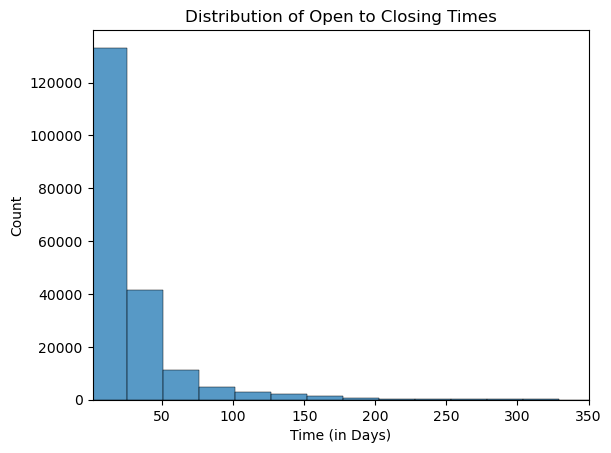

In [96]:
plt.figure(figsize = (10,6))
fig, ax = plt.subplots()

sns.set_style()
sns.histplot(data = ask_to_close, bins = 100)
ax.set_xlim(1, 350)
plt.xlabel("Time (in Days)")
plt.ylabel("Count")
plt.title("Distribution of Open to Closing Times")
plt.savefig("figures/OpenToCloseDist.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

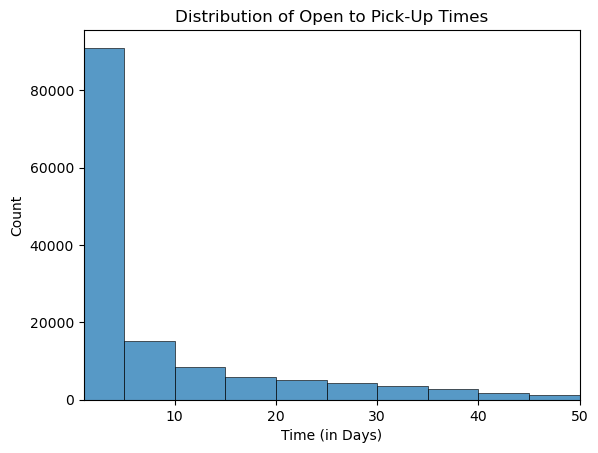

In [97]:
plt.figure(figsize = (10,6))
fig, ax = plt.subplots()

sns.set_style()
sns.histplot(data = ask_to_take, bins = 75)
ax.set_xlim(1, 50)
plt.xlabel("Time (in Days)")
plt.ylabel("Count")
plt.title("Distribution of Open to Pick-Up Times")
plt.savefig("figures/OpenToTakeDist.png")
plt.show()

<Figure size 1000x600 with 0 Axes>

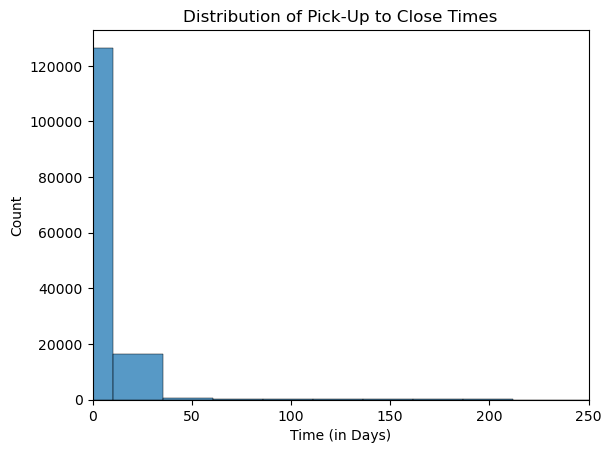

In [98]:
plt.figure(figsize = (10,6))
fig, ax = plt.subplots()

sns.set_style()
sns.histplot(data = take_to_close, bins = 100)
ax.set_xlim(0, 250)
plt.xlabel("Time (in Days)")
plt.ylabel("Count")
plt.title("Distribution of Pick-Up to Close Times")
plt.savefig("figures/TakeToCloseDist.png")
plt.show()

In [99]:
def print_stats(listy):
    avg = sum(listy) / len(listy)
    mini = min(listy)
    maxi = max(listy)
    print("Average: ", avg)
    print("Minimum: ", mini)
    print("Maximum: ", maxi)

In [100]:
print_stats(ask_to_take)
print("----------------")
print_stats(take_to_close)
print("----------------")
print_stats(ask_to_close)

Average:  10.033552807739047
Minimum:  0
Maximum:  375
----------------
Average:  8.520690369347601
Minimum:  -15
Maximum:  2504
----------------
Average:  26.189627546023054
Minimum:  0
Maximum:  2531
